# VaR

En matemáticas financieras y gestión del riesgo financiero, el valor en riesgo (abreviado VaR a partir de su expresión en inglés, Value at Risk) es una medida de riesgo ampliamente utilizada del riesgo de mercado en una cartera de inversiones de activos financieros.

Para un portafolio, un horizonte de tiempo y una probabilidad *p* dados, el *p*-VaR puede ser definido informalmente como la máxima pérdida posible durante un tiempo después de excluir todos los peores resultados cuya probabilidad es a lo más *p* (asumiendo mercados normales y que no se produce negociación en el portafolio).

Por ejemplo, si un portafolio de acciones tiene un VaR a un día del *5%* sobre 1 millón, existe una probabilidad del 0.05 de que el portafolio caiga en valor por más de $1 millón en un período de un día si no existe trading. Informalmente, una pérdida de 1 millón o más en esta cartera se espera que sea de 1 día entre 20. Una pérdida que excede el umbral del VaR se denomina “VaR break.”

El VaR tiene cinco usos principales en finanzas: gestión del riesgo, medida del riesgo, control financiero, reporte financiero y cálculo del capital regulatorio. El VaR se utiliza en ocasiones en aplicaciones no financieras también.

**El VaR tiene 3 ingredientes principales:**

1. Una desviación estándar que define los niveles de perdidas.
2. Un tiempo fijo por el cual se evalua el riesgo
3. Intervalos de confianza

**El VaR se puede medir de tres diferentes maneras:**

- Varianza-Covarianza
- Simulación histórica
- Monte Carlo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

**Ilustración Value at Risk**

Asumiendo un portafolio con media 0 y desviacion estándar 1 y siendo pdf una función de densidad de probabilidad, tenemos...

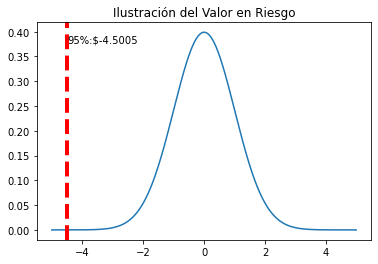

In [2]:
#Media
media = 0

#desviación
desviacion = 1

#Genera valores de x distribuidos de manera uniformes desde -5 a 5
x = np.arange(-5, 5, 0.01)

#Genera la funcion de densidad de probabilidad para los valores de x con media 0 y desviacion 1
y = norm.pdf(x, media, desviacion)

#graficos la funcion de densidad de probabilidad para x y y
pdf = plt.plot(x, y)

#limitamos 
min_ylim, max_ylim = plt.ylim()

plt.text(np.percentile(x, 5), max_ylim * 0.9, '95%:${:.4f}'.format(np.percentile(x, 5)))

plt.axvline(np.percentile(x, 5), color='r', linestyle='dashed', linewidth=4)

plt.title('Ilustración del Valor en Riesgo')

plt.show()

# Metodo Varianza-Covarianza

In [3]:
stocks = pd.read_excel('acciones.xlsx')

In [4]:
stocks.head()

,Date,IBM,INTEL,MSFT
0,2021-10-13,134.569794,52.259998,296.309998
1,2021-10-14,137.084137,53.900002,302.750000
2,2021-10-15,138.250473,54.459999,304.209991
3,2021-10-18,136.061188,54.470001,307.290009
4,2021-10-19,135.736145,55.209999,308.230011


In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   IBM     253 non-null    float64       
 2   INTEL   253 non-null    float64       
 3   MSFT    253 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.0 KB


In [6]:
stocks.set_index('Date', inplace=True)

In [7]:
stocks.head()

,IBM,INTEL,MSFT
Date,,,
2021-10-13,134.569794,52.259998,296.309998
2021-10-14,137.084137,53.900002,302.750000
2021-10-15,138.250473,54.459999,304.209991
2021-10-18,136.061188,54.470001,307.290009
2021-10-19,135.736145,55.209999,308.230011


In [8]:
stocks_rendimientos = (np.log(stocks)-np.log(stocks.shift(-1))).dropna()
stocks_rendimientos.head()

,IBM,INTEL,MSFT
Date,,,
2021-10-13,-0.018512,-0.030899,-0.021501
2021-10-14,-0.008472,-0.010336,-0.004811
2021-10-15,0.015962,-0.000184,-0.010074
2021-10-18,0.002392,-0.013494,-0.003054
2021-10-19,0.000564,-0.002894,0.002664


In [9]:
stocks_rendimientos_prom = stocks_rendimientos.mean()
stocks_rendimientos_prom

IBM      0.000549
INTEL    0.002862
MSFT     0.001089
dtype: float64

In [10]:
pesos = np.random.random(len(stocks_rendimientos.columns))
pesos

array([0.07975157, 0.6718879 , 0.56292855])

In [11]:
pesos = pesos/np.sum(pesos)
pesos

array([0.06066751, 0.51110927, 0.42822322])

In [12]:
cov_var = stocks_rendimientos.cov()
cov_var

,IBM,INTEL,MSFT
IBM,0.000243,0.000126,0.000092
INTEL,0.000126,0.000532,0.000272
MSFT,0.000092,0.000272,0.000401


In [13]:
desv_portafolio = np.sqrt(pesos.T.dot(cov_var).dot(pesos))
desv_portafolio

0.018569000903335988

In [14]:
inversion_inicial = 1e6
nivel_conf = 0.95

**PPF Percent point function:**, La probabilidad de un evento igual o menor que un valor dado se define mediante la función de distribución acumulativa, o CDF para abreviar. El inverso de la CDF se llama función de punto porcentual y dará el resultado discreto que es menor o igual a una probabilidad.

In [15]:
def VaR_parametric(inversion, confianza):
    
    alpha = norm.ppf(1 - confianza, stocks_rendimientos_prom, desv_portafolio)
        
    for i, j in zip(stocks.columns, range(len(stocks.columns))):
        VaR_param = (inversion - inversion * (1 + alpha))[j]
        
        print("El VaR Parametrico para {} es {:,.2f} ".format(i, VaR_param))
    
    VaR_param = (inversion - inversion * (1 + alpha))
    
    print('--' * 50)
    
    return VaR_param

In [16]:
VaR_param = VaR_parametric(inversion_inicial, nivel_conf)
VaR_param

El VaR Parametrico para IBM es 29,994.53 
El VaR Parametrico para INTEL es 27,681.70 
El VaR Parametrico para MSFT es 29,453.80 
----------------------------------------------------------------------------------------------------


array([29994.53287911, 27681.70170179, 29453.80224167])

El VaR puede cambiar dependiendo el horizonte de tiempo, dado que el mantener activos por un largo periodo de tiempo hace que el inversor sea más propenso a un evento de riesgo. El VaR incrementa con relación al monto y el tiempo que mantiene el activo a un ritmo $\sqrt{t}$.

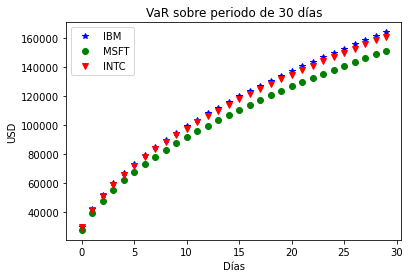

In [17]:
var_horizon = []

time_horizon = 30

for j in range(len(stocks_rendimientos.columns)):
    
    for i in range(1, time_horizon + 1):
        
        var_horizon.append(VaR_param[j] * np.sqrt(i))
        
plt.plot(var_horizon[:time_horizon], "o", c='blue', marker='*', label='IBM')

plt.plot(var_horizon[time_horizon:time_horizon + 30], "o", c='green', marker='o', label='MSFT')

plt.plot(var_horizon[time_horizon + 30:time_horizon + 60], "o", c='red', marker='v', label='INTC')

plt.xlabel("Días")
plt.ylabel("USD")
plt.title("VaR sobre periodo de 30 días")
plt.legend()
plt.show()

Bueno, aunque la normalidad suene atractiva, puede que no sea la mejor manera de estimar el VaR, especialmente en el caso de que los rendimientos de los activos no tengan una distribución normal. Afortunadamente, hay otro método que no tiene supuesto de normalidad, el modelo VaR de simulación histórica.

# Metodo Simulación Histórica

In [18]:
def VaR_historico(inversion, confianza):
    Hist_percentile95 = []
    
    for i, j in zip(stocks_rendimientos.columns, range(len(stocks_rendimientos.columns))):
        
        Hist_percentile95.append(np.percentile(stocks_rendimientos.loc[:, i], 1-confianza))
        
        print("Con un 95% de confianza el rendimiento de las acciones de {} no será menor a {:.4f}".format(i, Hist_percentile95[j]))
        
        VaR_historico = (inversion - inversion * (1 + Hist_percentile95[j]))
        
        print("Con un 95% de confianza las acciones de {} no presentarán perdidas mayores a {:,.2f} en un día".format(i, VaR_historico))
        
        print('--' * 50)

In [19]:
VaR_historico(inversion_inicial, nivel_conf)

Con un 95% de confianza el rendimiento de las acciones de IBM no será menor a -0.0669
Con un 95% de confianza las acciones de IBM no presentarán perdidas mayores a 66,885.91 en un día
----------------------------------------------------------------------------------------------------
Con un 95% de confianza el rendimiento de las acciones de INTEL no será menor a -0.0644
Con un 95% de confianza las acciones de INTEL no presentarán perdidas mayores a 64,390.03 en un día
----------------------------------------------------------------------------------------------------
Con un 95% de confianza el rendimiento de las acciones de MSFT no será menor a -0.0628
Con un 95% de confianza las acciones de MSFT no presentarán perdidas mayores a 62,844.61 en un día
----------------------------------------------------------------------------------------------------


# Metodo Monte Carlo

In [20]:
sim_data = pd.DataFrame([])
num_reps = 1000

for i in range(len(stocks.columns)):
    mean = stocks_rendimientos[stocks.columns[i]].mean()
    std = stocks_rendimientos[stocks.columns[i]].std()
    temp = pd.DataFrame(np.random.normal(mean, std, num_reps))
    temp.columns = [i]
    sim_data = pd.concat([sim_data, temp], axis=1)

In [21]:
for columns in list(range(len(sim_data.columns))):
    sim_data.rename({sim_data.columns[columns]:stocks.columns[columns]},inplace=True, axis='columns')

In [22]:
sim_data.head()

,IBM,INTEL,MSFT
0,0.006172,0.047578,-0.042481
1,-0.004679,-0.014109,-0.005782
2,0.021502,0.022139,0.007872
3,-0.021228,-0.024801,-0.019892
4,0.005203,0.012156,-0.022935


In [23]:
def MC_VaR(inversion, confianza):
    
    MC_percentile95 = []
    
    for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
        
        MC_percentile95.append(np.percentile(sim_data.loc[:, i], 1-confianza))
        
        print("Con un 95% de confianza el rendimiento de las acciones de {} no será menor a {:.4f}".format(i, MC_percentile95[j]))
        
        VaR_MC = (inversion - inversion * (1 + MC_percentile95[j]))
        
        print("Con un 95% de confianza las acciones de {} no presentarán perdidas mayores a {:,.2f} en un día".format(i, VaR_MC))
        
        print('--' * 50)

In [24]:
MC_VaR(inversion_inicial, nivel_conf)

Con un 95% de confianza el rendimiento de las acciones de IBM no será menor a -0.0490
Con un 95% de confianza las acciones de IBM no presentarán perdidas mayores a 48,967.25 en un día
----------------------------------------------------------------------------------------------------
Con un 95% de confianza el rendimiento de las acciones de INTEL no será menor a -0.0653
Con un 95% de confianza las acciones de INTEL no presentarán perdidas mayores a 65,336.71 en un día
----------------------------------------------------------------------------------------------------
Con un 95% de confianza el rendimiento de las acciones de MSFT no será menor a -0.0641
Con un 95% de confianza las acciones de MSFT no presentarán perdidas mayores a 64,148.45 en un día
----------------------------------------------------------------------------------------------------


# Fin